In [1]:
import os
import sys
import time
import h5py

import numpy as np
from glob import glob

from datetime import datetime, timedelta

In [2]:
sys.path.insert(0, '/glade/u/home/ksha/GAN_proj/')
sys.path.insert(0, '/glade/u/home/ksha/GAN_proj/libs/')

from namelist import *
import data_utils as du
import graph_utils as gu

In [3]:
# graph tools
import cmaps
import cartopy.crs as ccrs
import cartopy.mpl.geoaxes
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.colors as colors
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection

from matplotlib import ticker
import matplotlib.ticker as mticker
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

%matplotlib inline

In [4]:
with h5py.File(save_dir+'CNN_domain.hdf', 'r') as h5io:
    lon_01 = h5io['lon_01'][...]
    lat_01 = h5io['lat_01'][...]
    lon_GFS = h5io['lon_GFS'][...]
    lat_GFS = h5io['lat_GFS'][...]    

In [5]:
# Cartopy map settings
scale_param = '50m' # 10m for publication quality
# US states and CAN-US boundary
PROVINCE = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale=scale_param,
    facecolor='none')

cmap_pct, A = gu.precip_cmap()

In [7]:
# # data size info
# x_mrms = 256; y_mrms = 576 # 0.1 deg MRMS size
# x_gfs = 105; y_gfs = 242 # 0.25 deg GFS size

# Nx_pred = 2
# Ny_pred = 5
# Ny_gap = 12
# size_pred = 128


# name = '/glade/campaign/cisl/aiml/ksha/LDM_results/LDM_day{:03d}_ini{:02d}_lead{:02d}.npy'
# ini = 0
# lead = 24

# day = 36

# for day in range(300):
#     try:
#         temp_data = np.load(name.format(day, ini, lead), allow_pickle=True)[()]
#         MRMS_pred = np.exp(temp_data['MRMS_pred']) - 1
#         MRMS_true = np.exp(temp_data['MRMS_true']) - 1
#         APCP_true = np.exp(temp_data['APCP_true']) - 1
        
#         MRMS_pred_domain = np.empty((10, x_mrms, y_mrms)); MRMS_pred_domain[...] = np.nan
#         MRMS_true_domain = np.empty((x_mrms, y_mrms)); MRMS_true_domain[...] = np.nan
#         APCP_true_domain = np.empty((x_mrms, y_mrms)); APCP_true_domain[...] = np.nan
        
#         count = 0
#         for px in range(Nx_pred):
#             for py in range(Ny_pred):
#                 ix0 = size_pred*px
#                 ix1 = ix0+size_pred
                
#                 if py < (Ny_pred-1):
#                     iy0 = (size_pred-Ny_gap)*py
#                     iy1 = iy0 + size_pred
#                 else:
#                     iy1 = y_mrms
#                     iy0 = y_mrms - size_pred
        
#                 MRMS_pred_domain[:, ix0:ix1, iy0:iy1] = MRMS_pred[:, count, :, :]
#                 MRMS_true_domain[ix0:ix1, iy0:iy1] = MRMS_true[count, :, :]
#                 APCP_true_domain[ix0:ix1, iy0:iy1] = APCP_true[count, :, :]
#                 count += 1
        
#         MRMS_pred_domain[np.isnan(MRMS_pred_domain)] = 0
#         MRMS_pred_domain[MRMS_pred_domain<0] = 0

#         fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3))
#         ax1.pcolormesh(APCP_true_domain, vmin=0, vmax=15, cmap=cmap_pct)
#         ax2.pcolormesh(MRMS_true_domain, vmin=0, vmax=15, cmap=cmap_pct)
#         ax3.pcolormesh(MRMS_pred_domain[0, ...], vmin=0, vmax=15, cmap=cmap_pct)
#         ax3.set_title('{}'.format(day), fontsize=14)
#     except:
#         continue;

In [8]:
# data size info
x_mrms = 256; y_mrms = 576 # 0.1 deg MRMS size
x_gfs = 105; y_gfs = 242 # 0.25 deg GFS size

Nx_pred = 2
Ny_pred = 5
Ny_gap = 12
size_pred = 128


name = '/glade/campaign/cisl/aiml/ksha/LDM_results/LDM_day{:03d}_ini{:02d}_lead{:02d}.npy'
ini = 0
lead = 24

day = 52

temp_data = np.load(name.format(day, ini, lead), allow_pickle=True)[()]
MRMS_pred = np.exp(temp_data['MRMS_pred']) - 1
MRMS_true = np.exp(temp_data['MRMS_true']) - 1
APCP_true = np.exp(temp_data['APCP_true']) - 1

MRMS_pred_domain = np.empty((10, x_mrms, y_mrms)); MRMS_pred_domain[...] = np.nan
MRMS_true_domain = np.empty((x_mrms, y_mrms)); MRMS_true_domain[...] = np.nan
APCP_true_domain = np.empty((x_mrms, y_mrms)); APCP_true_domain[...] = np.nan

count = 0
for px in range(Nx_pred):
    for py in range(Ny_pred):
        ix0 = size_pred*px
        ix1 = ix0+size_pred
        
        if py < (Ny_pred-1):
            iy0 = (size_pred-Ny_gap)*py
            iy1 = iy0 + size_pred
        else:
            iy1 = y_mrms
            iy0 = y_mrms - size_pred

        MRMS_pred_domain[:, ix0:ix1, iy0:iy1] = MRMS_pred[:, count, :, :]
        MRMS_true_domain[ix0:ix1, iy0:iy1] = MRMS_true[count, :, :]
        APCP_true_domain[ix0:ix1, iy0:iy1] = APCP_true[count, :, :]
        count += 1

MRMS_pred_domain[np.isnan(MRMS_pred_domain)] = 0
MRMS_pred_domain[MRMS_pred_domain<0] = 0


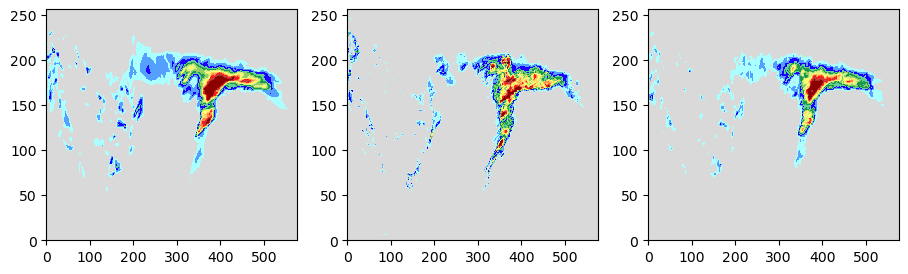

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(11, 3))
ax1.pcolormesh(APCP_true_domain, vmin=0, vmax=15, cmap=cmap_pct)
ax2.pcolormesh(MRMS_true_domain, vmin=0, vmax=15, cmap=cmap_pct)
ax3.pcolormesh(np.mean(MRMS_pred_domain, axis=0), vmin=0, vmax=15, cmap=cmap_pct)

In [10]:
MAE_pred = np.mean(np.abs(MRMS_true_domain[None, ...] - MRMS_pred_domain), axis=(1, 2))
MAE_apcp = np.mean(np.abs(MRMS_true_domain - APCP_true_domain))

In [11]:
MAE_mean = np.mean(np.abs(MRMS_true_domain- np.mean(MRMS_pred_domain, axis=0)))

In [12]:
year = 2023
base = datetime(year, 1, 1)
date_list = [base + timedelta(days=d) for d in range(365)]

In [13]:
date_list[day]

datetime.datetime(2023, 2, 22, 0, 0)

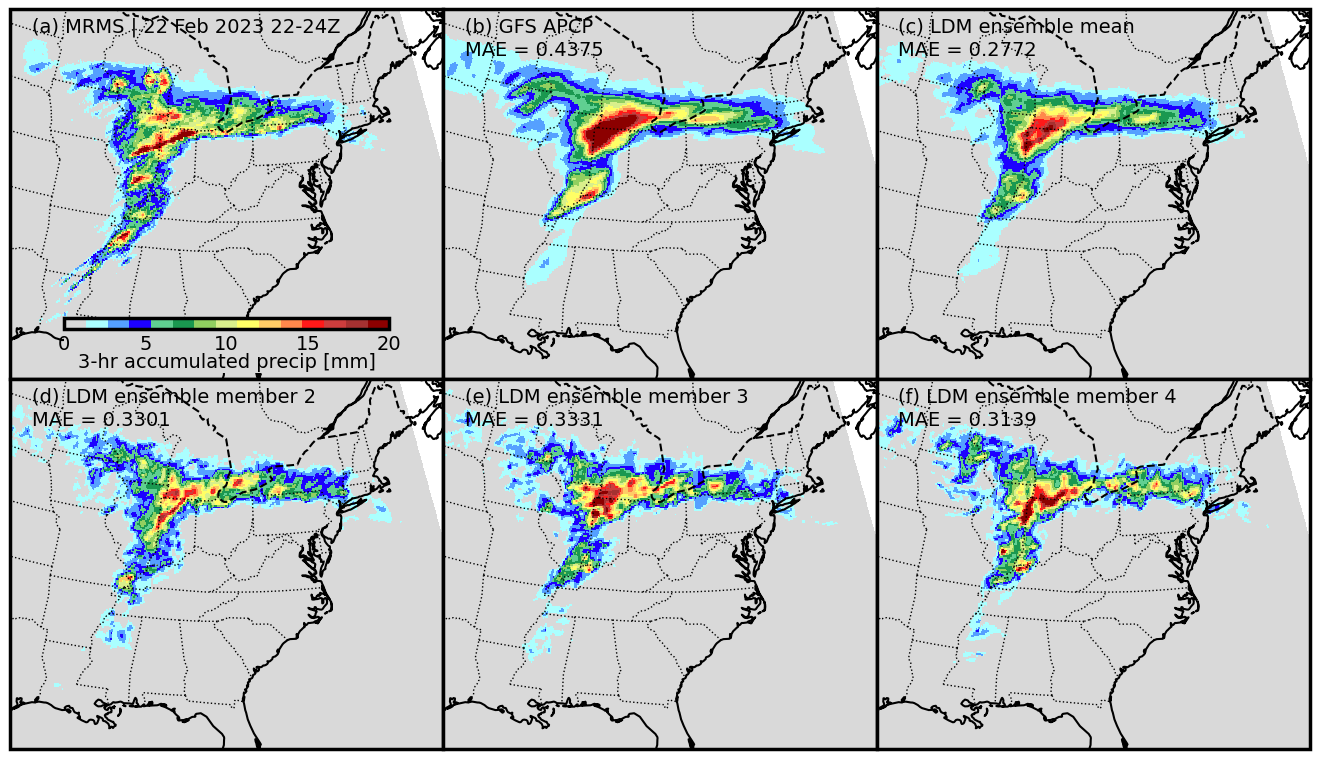

In [22]:
edge = [-95, -70, 28, 48]

fig = plt.figure(figsize=(13, 11.1/3*2)) #, dpi=dpi_
gs = gridspec.GridSpec(2, 3, height_ratios=[1, 1,], width_ratios=[1, 1, 1])

proj_ = ccrs.NorthPolarStereo(central_longitude=0.5*(edge[0] + edge[1]))

ax0 = plt.subplot(gs[0, 0], projection=proj_)
ax1 = plt.subplot(gs[0, 1], projection=proj_)
ax2 = plt.subplot(gs[0, 2], projection=proj_)
ax3 = plt.subplot(gs[1, 0], projection=proj_)
ax4 = plt.subplot(gs[1, 1], projection=proj_)
ax5 = plt.subplot(gs[1, 2], projection=proj_)


titles = ['(a) MRMS | 22 Feb 2023 22-24Z', '(b) GFS APCP', '(c) LDM ensemble mean', 
          '(d) LDM ensemble member 2', '(e) LDM ensemble member 3', '(f) LDM ensemble member 4', '(g) LDM ensemble member 5', 
          '(h) LDM ensemble member 6', '(i) LDM ensemble member 7', '(j) LDM ensemble member 8']

for i, ax in enumerate([ax0, ax1, ax2, ax3, ax4, ax5,]):
    ax.set_extent(edge, ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE.with_scale(scale_param), edgecolor='k', linewidth=1.5, zorder=5)
    ax.add_feature(cfeature.BORDERS.with_scale(scale_param), linestyle='--', linewidth=1.5, zorder=5)
    ax.add_feature(PROVINCE, edgecolor='k', linestyle=':', linewidth=1.0, zorder=5)
    ax.spines['geo'].set_linewidth(2.5)
    ax.text(0.05, 0.98, titles[i], ha='left', va='top', fontsize=14, transform=ax.transAxes)
    if i == 1:
        ax.text(0.05, 0.875, 'MAE = {:0.4f}'.format(MAE_apcp), fontsize=14, transform=ax.transAxes)
    if i == 2:
        ax.text(0.05, 0.875, 'MAE = {:0.4f}'.format(MAE_mean), fontsize=14, transform=ax.transAxes)
    if i >= 3:
        ax.text(0.05, 0.875, 'MAE = {:0.4f}'.format(MAE_pred[i-3]), fontsize=14, transform=ax.transAxes)
        
plt.subplots_adjust(0, 0, 1, 1, hspace=0.0, wspace=0.0)

CS1 = ax0.pcolormesh(lon_01, lat_01, MRMS_true_domain, vmin=0, vmax=20, cmap=cmap_pct, transform=ccrs.PlateCarree())
ax1.pcolormesh(lon_01, lat_01, APCP_true_domain, vmin=0, vmax=20, cmap=cmap_pct, transform=ccrs.PlateCarree())
ax2.pcolormesh(lon_01, lat_01, np.mean(MRMS_pred_domain, axis=0), vmin=0, vmax=20, cmap=cmap_pct, transform=ccrs.PlateCarree())

for i, ax in enumerate([ax3, ax4, ax5,]):
    ax.pcolormesh(lon_01, lat_01, MRMS_pred_domain[i-3, ...], vmin=0, vmax=20, cmap=cmap_pct, transform=ccrs.PlateCarree())
    

ax_base = fig.add_axes([0.5*(1/3-1/4), 1/2+0.0075, 1/4, 0.075])
ax_base.set_facecolor(A[0, ...])
[j.set_linewidth(0.0) for j in ax_base.spines.values()]
ax_base.tick_params(axis='both', left=False, top=False, right=False, bottom=False, \
                    labelleft=False, labeltop=False, labelright=False, labelbottom=False)
cax = inset_axes(ax_base, height='20%', width='100%', borderpad=0, loc=2)
CBar = plt.colorbar(CS1, orientation='horizontal', cax=cax)
CBar.ax.tick_params(axis='x', labelsize=14, direction='in', length=0)
CBar.outline.set_linewidth(2.5)
ax_base.text(0.5, 0.05, '3-hr accumulated precip [mm]', ha='center', va='bottom', fontsize=14, transform=ax_base.transAxes);

# ax1.set_title('(a) GFS APCP | 01-03Z 1 January 2021', fontsize=14)
# ax2.set_title('(b) MRMS QPE | 01-03Z 1 January 2021', fontsize=14)

In [23]:
# edge = [-118, -78, 25, 50.5]

# fig = plt.figure(figsize=(13, 9)) #, dpi=dpi_
# gs = gridspec.GridSpec(3, 3, height_ratios=[1, 1, 1], width_ratios=[1, 1, 1])

# proj_ = ccrs.NorthPolarStereo(central_longitude=0.5*(edge[0] + edge[1]))

# ax0 = plt.subplot(gs[0, 0], projection=proj_)
# ax1 = plt.subplot(gs[0, 1], projection=proj_)
# ax2 = plt.subplot(gs[0, 2], projection=proj_)
# ax3 = plt.subplot(gs[1, 0], projection=proj_)
# ax4 = plt.subplot(gs[1, 1], projection=proj_)
# ax5 = plt.subplot(gs[1, 2], projection=proj_)
# ax6 = plt.subplot(gs[2, 0], projection=proj_)
# ax7 = plt.subplot(gs[2, 1], projection=proj_)
# ax8 = plt.subplot(gs[2, 2], projection=proj_)

# titles = ['(a) MRMS | 3 February 2023 01-03Z', '(b) GFS APCP', '(c) LDM ensemble 1', 
#           '(d) LDM ensemble 2', '(e) LDM ensemble 3', '(f) LDM ensemble 4', '(g) LDM ensemble 5', 
#           '(h) LDM ensemble 6', '(i) LDM ensemble 7', '(j) LDM ensemble 8']

# for i, ax in enumerate([ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]):
#     ax.set_extent(edge, ccrs.PlateCarree())
#     ax.add_feature(cfeature.COASTLINE.with_scale(scale_param), edgecolor='k', linewidth=1.5, zorder=5)
#     ax.add_feature(cfeature.BORDERS.with_scale(scale_param), linestyle='--', linewidth=1.5, zorder=5)
#     ax.add_feature(PROVINCE, edgecolor='k', linestyle=':', linewidth=1.0, zorder=5)
#     ax.spines['geo'].set_linewidth(2.5)
#     ax.text(0.05, 0.98, titles[i], ha='left', va='top', fontsize=14, transform=ax.transAxes)
#     if i == 1:
#         ax.text(0.05, 0.82, 'MAE = {:0.4f}'.format(MAE_apcp), fontsize=14, transform=ax.transAxes)
#     if i >= 2:
#         ax.text(0.05, 0.82, 'MAE = {:0.4f}'.format(MAE_pred[i-2]), fontsize=14, transform=ax.transAxes)
        
# plt.subplots_adjust(0, 0, 1, 1, hspace=0.0, wspace=0.0)

# CS1 = ax0.pcolormesh(lon_01, lat_01, MRMS_true_domain, vmin=0, vmax=20, cmap=cmap_pct, transform=ccrs.PlateCarree())
# ax1.pcolormesh(lon_01, lat_01, APCP_true_domain, vmin=0, vmax=20, cmap=cmap_pct, transform=ccrs.PlateCarree())
# for i, ax in enumerate([ax2, ax3, ax4, ax5, ax6, ax7, ax8]):
#     ax.pcolormesh(lon_01, lat_01, MRMS_pred_domain[i, ...], vmin=0, vmax=20, cmap=cmap_pct, transform=ccrs.PlateCarree())
    

# ax_base = fig.add_axes([0.5*(1/3-1/4), 2/3+0.01, 1/4, 0.07])
# ax_base.set_facecolor(A[0, ...])
# [j.set_linewidth(0.0) for j in ax_base.spines.values()]
# ax_base.tick_params(axis='both', left=False, top=False, right=False, bottom=False, \
#                     labelleft=False, labeltop=False, labelright=False, labelbottom=False)
# cax = inset_axes(ax_base, height='30%', width='100%', borderpad=0, loc=2)
# CBar = plt.colorbar(CS1, orientation='horizontal', cax=cax)
# CBar.ax.tick_params(axis='x', labelsize=14, direction='in', length=0)
# CBar.outline.set_linewidth(2.5)
# ax_base.text(0.5, 0.05, '3-hr accumulated precip [mm]', ha='center', va='bottom', fontsize=14, transform=ax_base.transAxes)

# # ax1.set_title('(a) GFS APCP | 01-03Z 1 January 2021', fontsize=14)
# # ax2.set_title('(b) MRMS QPE | 01-03Z 1 January 2021', fontsize=14)